In [1]:
from qiskit import *

In [2]:
black_box = QuantumCircuit(3,name = "Black Box")
black_box.draw()

q_0: 
     
q_1: 
     
q_2:

In [3]:
black_box.cx(0,1)

In [4]:
black_box.cx(1,2)

In [5]:
black_box.draw()

q_0: ──■───────
     ┌─┴─┐     
q_1: ┤ X ├──■──
     └───┘┌─┴─┐
q_2: ─────┤ X ├
          └───┘

In [6]:
black_box.cz(0,1)

In [7]:
black_box.draw()

q_0: ──■────────■─
     ┌─┴─┐      │ 
q_1: ┤ X ├──■───■─
     └───┘┌─┴─┐   
q_2: ─────┤ X ├───
          └───┘

In [8]:
black_box.to_gate()

In [9]:
black_box.draw()

q_0: ──■────────■─
     ┌─┴─┐      │ 
q_1: ┤ X ├──■───■─
     └───┘┌─┴─┐   
q_2: ─────┤ X ├───
          └───┘

In [10]:
c = ClassicalRegister(3)
grover_algo = QuantumCircuit(3,2)

In [11]:
grover_algo.draw()

q_0: 
     
q_1: 
     
q_2: 
     
c: 2/

In [14]:
grover_algo.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘
c: 2/═════

In [15]:
grover_algo.append(black_box,[0,1,2])

In [16]:
grover_algo.draw()

┌───┐┌────────────┐
q_0: ┤ H ├┤0           ├
     ├───┤│            │
q_1: ┤ H ├┤1 Black Box ├
     ├───┤│            │
q_2: ┤ H ├┤2           ├
     └───┘└────────────┘
c: 2/═══════════════════

In [17]:
grover_algo.h([0,1])

In [18]:
grover_algo.x([0,1])

In [19]:
grover_algo.h(1)

In [20]:
grover_algo.draw()

┌───┐┌────────────┐┌───┐┌───┐     
q_0: ┤ H ├┤0           ├┤ H ├┤ X ├─────
     ├───┤│            │├───┤├───┤┌───┐
q_1: ┤ H ├┤1 Black Box ├┤ H ├┤ X ├┤ H ├
     ├───┤│            │└───┘└───┘└───┘
q_2: ┤ H ├┤2           ├───────────────
     └───┘└────────────┘               
c: 2/══════════════════════════════════

In [21]:
grover_algo.cx(0,1)

In [22]:
grover_algo.h(1)

In [23]:
grover_algo.draw()

┌───┐┌────────────┐┌───┐┌───┐               
q_0: ┤ H ├┤0           ├┤ H ├┤ X ├───────■───────
     ├───┤│            │├───┤├───┤┌───┐┌─┴─┐┌───┐
q_1: ┤ H ├┤1 Black Box ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     ├───┤│            │└───┘└───┘└───┘└───┘└───┘
q_2: ┤ H ├┤2           ├─────────────────────────
     └───┘└────────────┘                         
c: 2/════════════════════════════════════════════

In [25]:
grover_algo.x([0,1])

In [28]:
grover_algo.draw()

┌───┐┌────────────┐┌───┐┌───┐          ┌───┐┌───┐     
q_0: ┤ H ├┤0           ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤│            │├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
q_1: ┤ H ├┤1 Black Box ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     ├───┤│            │├───┤└───┘└───┘└───┘└───┘└───┘└───┘
q_2: ┤ H ├┤2           ├┤ H ├──────────────────────────────
     └───┘└────────────┘└───┘                              
c: 2/══════════════════════════════════════════════════════

In [30]:
grover_algo.measure([0,1],[0,1])

In [31]:
grover_algo.draw()

┌───┐┌────────────┐┌───┐┌───┐          ┌───┐┌───┐     ┌─┐   
q_0: ┤ H ├┤0           ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────┤M├───
     ├───┤│            │├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐└╥┘┌─┐
q_1: ┤ H ├┤1 Black Box ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫─┤M├
     ├───┤│            │├───┤└───┘└───┘└───┘└───┘└───┘└───┘ ║ └╥┘
q_2: ┤ H ├┤2           ├┤ H ├───────────────────────────────╫──╫─
     └───┘└────────────┘└───┘                               ║  ║ 
c: 2/═══════════════════════════════════════════════════════╩══╩═
                                                            0  1

In [32]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [33]:
provider = IBMQ.get_provider('ibm-q')

In [34]:
qcomp = provider.get_backend('ibmq_santiago')
job = execute(grover_algo, backend = qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


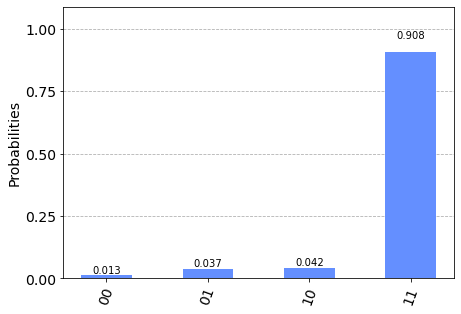

In [35]:
result = job.result()
result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts())

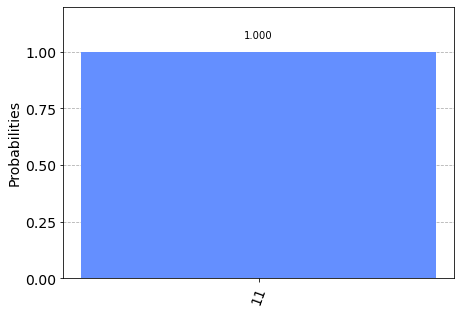

In [76]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(grover_algo, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)